In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# change plot style

sns.set(style="whitegrid")      # Note: there is no way in sns to get list of available styles, you can use matplotlib styles

In [3]:
# check list of all available styles

import matplotlib as mpl
print(mpl.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### Line plot

<Axes: >

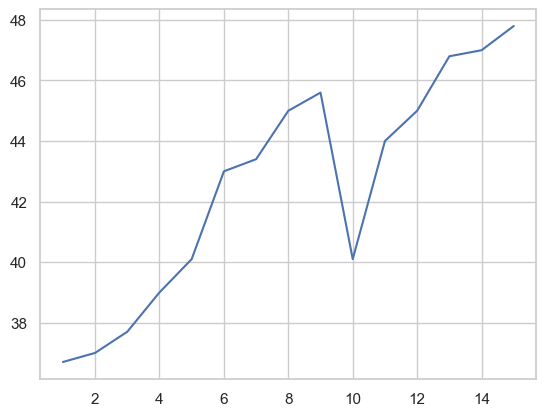

In [5]:
days = range(1,16)
chennai_temperature = [36.7, 37, 37.7, 39, 40.1, 43, 43.4, 45, 45.6, 40.1, 44, 45, 46.8, 47, 47.8]

sns.lineplot(x = days,y = chennai_temperature)

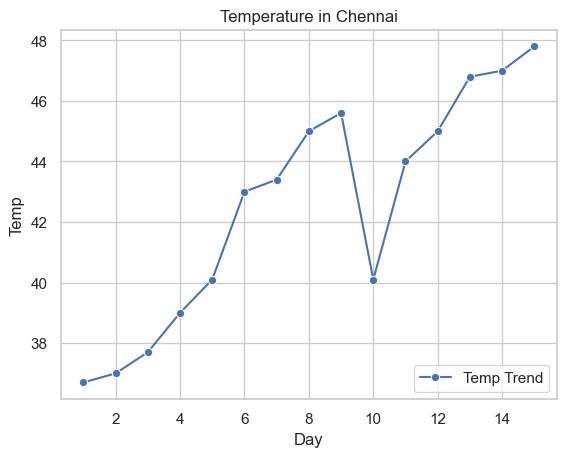

In [6]:
days = range(1,16)
chennai_temperature = [36.7, 37, 37.7, 39, 40.1, 43, 43.4, 45, 45.6, 40.1, 44, 45, 46.8, 47, 47.8]
df = pd.DataFrame({
    'Day': days,
    'Temperature': chennai_temperature
})

sns.lineplot(x='Day', y='Temperature', data=df, marker='o')
plt.title("Temperature in Chennai")
plt.xlabel("Day")
plt.ylabel("Temp")
plt.legend(["Temp Trend"], loc = 'lower right')
plt.show()

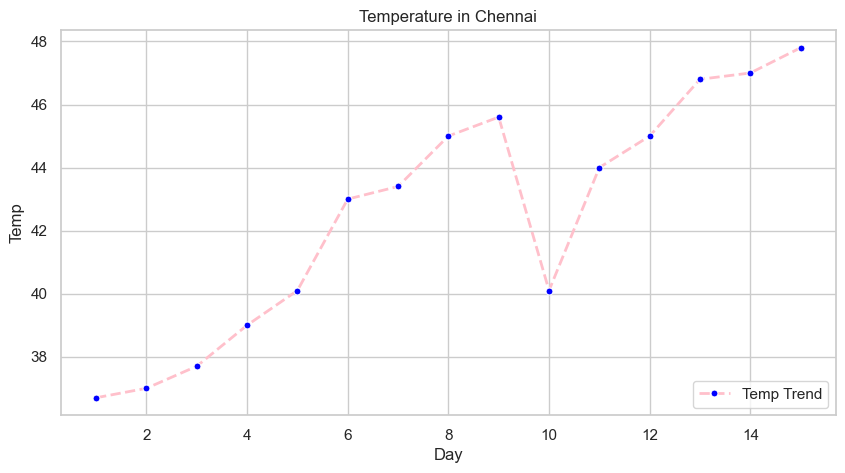

In [7]:
# color, linestyle, linewidth, marker, markersize,,markerfacecolor = 'blue'

plt.figure(figsize = (10,5))

sns.lineplot(x = days,y = chennai_temperature,color = 'pink', marker = "o", linestyle = "--", linewidth = 2, markersize = 5,markerfacecolor = 'blue')
plt.title("Temperature in Chennai")
plt.xlabel("Day")
plt.ylabel("Temp")
plt.legend(["Temp Trend"], loc = 'lower right')
plt.show()

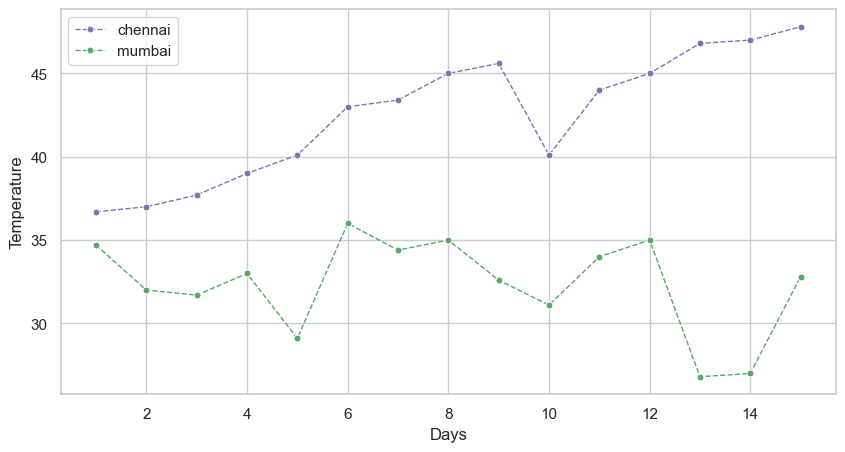

In [8]:
# multiple plots


days = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
chennai_temperature = [36.7, 37, 37.7, 39, 40.1, 43, 43.4, 45, 45.6, 40.1, 44, 45, 46.8, 47, 47.8]
mumbai_temperature = [34.7, 32, 31.7, 33, 29.1, 36, 34.4, 35, 32.6, 31.1, 34, 35, 26.8, 27, 32.8]

plt.figure(figsize = (10,5))
sns.lineplot(x = days, y = chennai_temperature, color = 'm', marker = 'o', linestyle = "--", linewidth = 1, markersize = 5, label = 'chennai')
sns.lineplot(x = days, y = mumbai_temperature, color = 'g', marker = 'o', linestyle = "--", linewidth = 1, markersize = 5, label = 'mumbai')

plt.xlabel('Days')
plt.ylabel('Temperature')
plt.legend(loc = 'upper left')
plt.show()

#### Work on Orders data

In [2]:
df = pd.read_excel("./data/Order.xlsx")
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


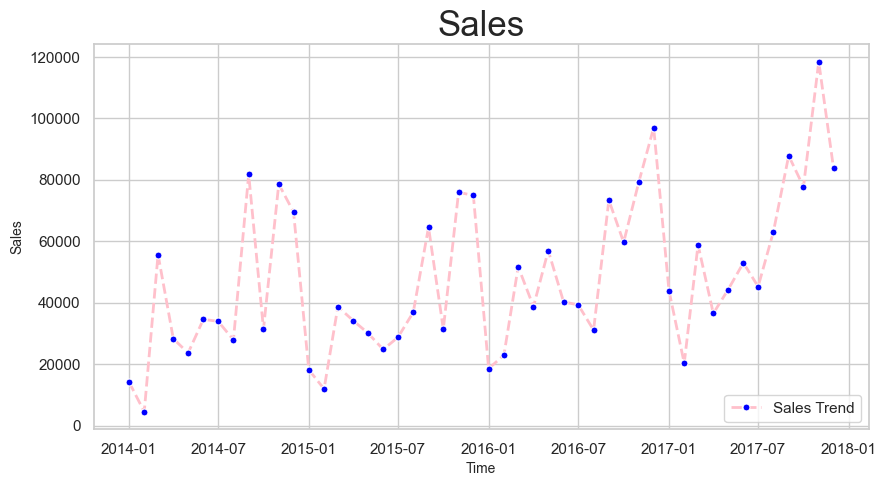

In [10]:
# plot monthly sale

plt.figure(figsize = (10,5))
data = df.groupby(by = df['Order Date'].dt.to_period('M'))['Sales'].sum()
time = data.index.to_timestamp()
sales = data.values

sns.lineplot(x = time, y = sales,color = 'pink', marker = "o", linestyle = "--", linewidth = 2, markersize = 5,markerfacecolor = 'blue')
plt.title("Sales", fontsize = 25)
plt.xlabel("Time", fontsize = 10)
plt.ylabel("Sales", fontsize = 10)
plt.legend(["Sales Trend"], loc = 'lower right')
plt.show()

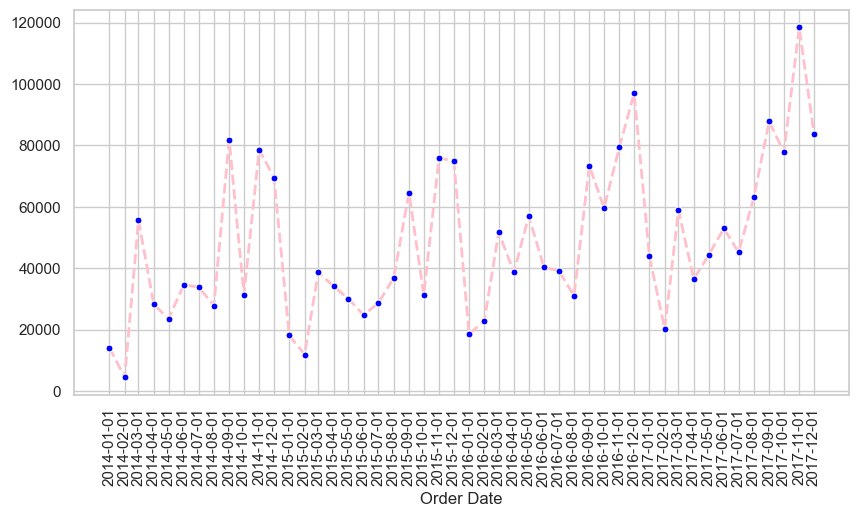

In [11]:
# get all dates on x-axis

data = df.groupby(by = df['Order Date'].dt.to_period('M'))['Sales'].sum()
time = data.index.to_timestamp()
sales = data.values

plt.figure(figsize = (10,5))
sns.lineplot(x = time, y = sales,color = 'pink', marker = "o", linestyle = "--", linewidth = 2, markersize = 5,markerfacecolor = 'blue')
plt.xticks(data.index.to_timestamp(), rotation = 90)
plt.show()

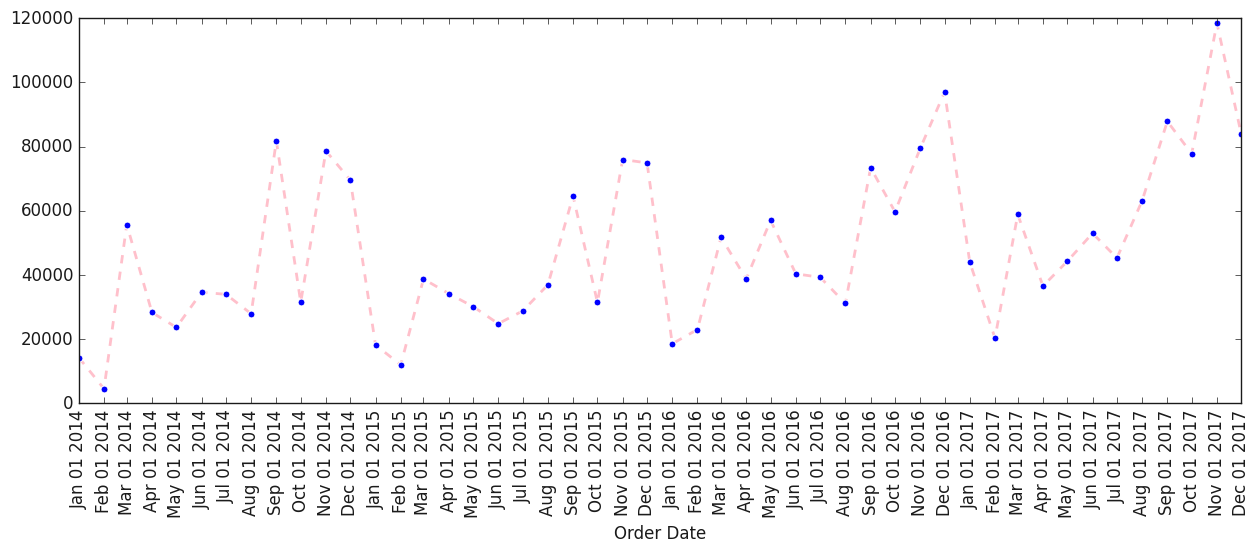

In [12]:
# Change Dateformat pf x-axis

import matplotlib.dates as mdates

data = df.groupby(by = df['Order Date'].dt.to_period('M'))['Sales'].sum()
time = data.index.to_timestamp()
sales = data.values

plt.figure(figsize = (15,5))
plt.style.use('classic')
sns.lineplot(x = time, y = sales,color = 'pink', marker = "o", linestyle = "--", linewidth = 2, markersize = 5,markerfacecolor = 'blue')
plt.xticks(data.index.to_timestamp(), rotation = 90)       
plt.show()

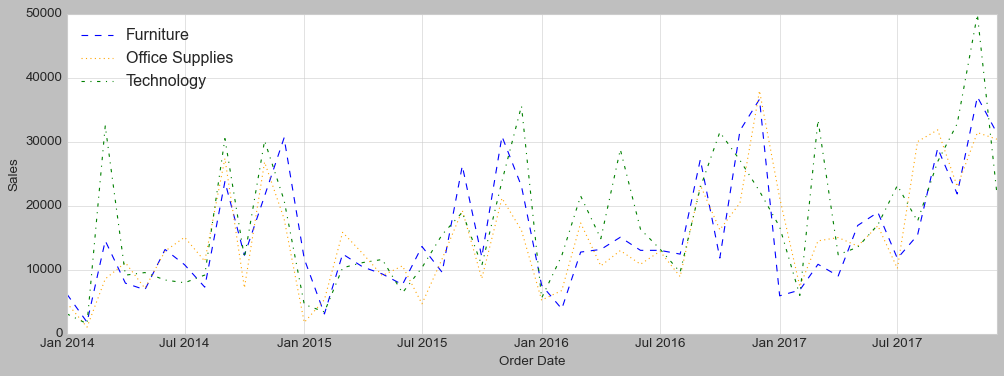

In [13]:
# Plot sales category wise (matplotlib approach)

data = df.groupby(by = [df['Order Date'].dt.to_period('M'),'Category'])['Sales'].sum().reset_index().set_index('Order Date')

plt.figure(figsize = (15,5))
plt.style.use('seaborn-v0_8-whitegrid')

colors = ['blue','orange','green']
linestyles = ['--','dotted','-.']

for cat,color,ls in zip(data['Category'].unique(), colors,linestyles):
    cat_data = data[data['Category'] == cat].sort_index()
    time = cat_data.index.to_timestamp()
    sales = cat_data['Sales']
    sns.lineplot(x = time, y= sales,color = color, label = cat, linestyle = ls)
    
plt.legend(loc = 'upper left')
plt.show()

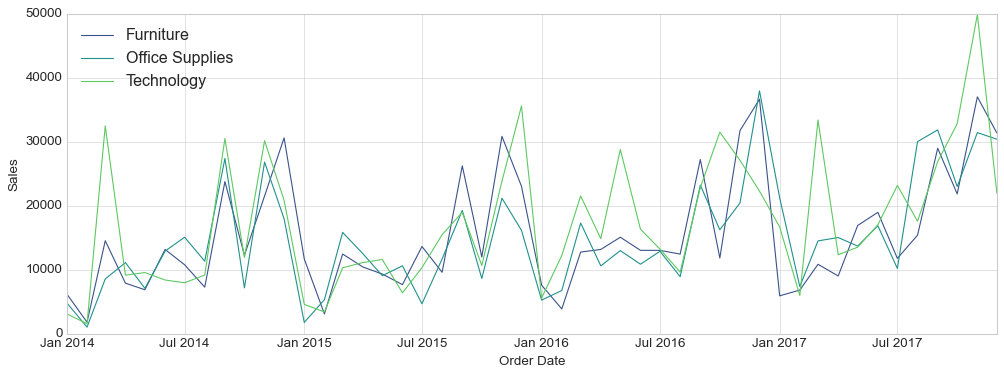

In [19]:
# Plot sales category wise (Seaborn approach with hue)

plt.figure(figsize = (15,5))
data = df.groupby(by = [df['Order Date'].dt.to_period('M'),'Category'])['Sales'].sum().reset_index().set_index('Order Date')
sns.lineplot(x = data.index.to_timestamp(), y= data.Sales,hue = data['Category'], palette='viridis')
plt.legend(loc = 'upper left')
plt.show()

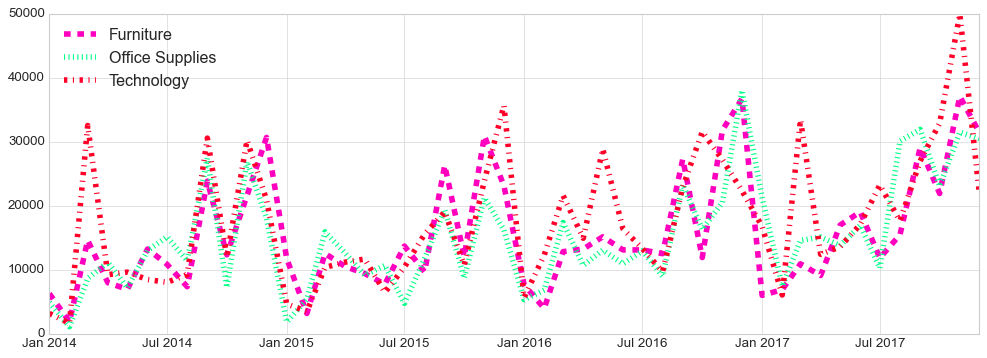

In [23]:
# pick colors from colormaps

plt.figure(figsize = (15,5))
data = df.groupby(by = [df['Order Date'].dt.to_period('M'),'Category'])['Sales'].sum().reset_index().set_index('Order Date')

cmap = plt.get_cmap('gist_rainbow_r')
colors = cmap(np.linspace(0, 1, data['Category'].nunique()))

linestyles = ['--','dotted','-.']
for cat,color,ls in zip(data['Category'].unique(), colors,linestyles):
    cat_data = data[data['Category'] == cat].sort_index()
    time = cat_data.index.to_timestamp()
    sales = cat_data['Sales']
    plt.plot(time, sales,color = color, label = cat, linestyle = ls, linewidth = 5)
    
plt.legend(loc = 'upper left')
plt.show()

### Scatter Plot

<Axes: xlabel='Sales', ylabel='Profit'>

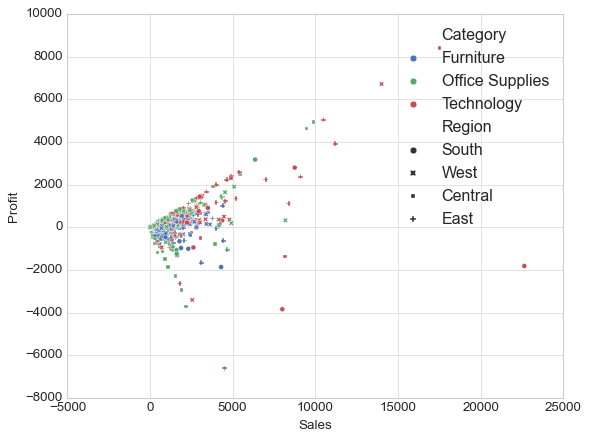

In [25]:
sns.set_style('whitegrid')
sns.scatterplot(x='Sales', y='Profit', data=df, hue = 'Category',style = 'Region')

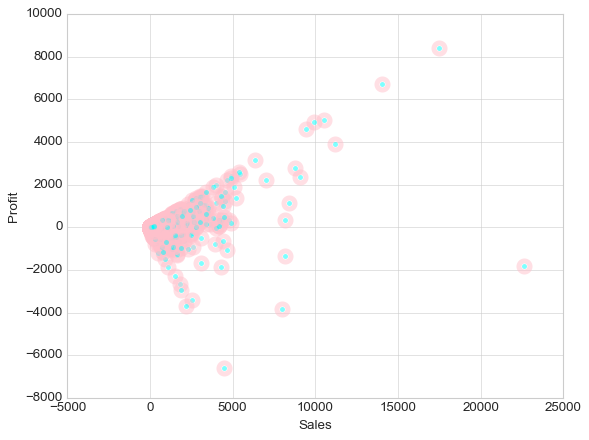

In [30]:
sns.set_style('whitegrid')
sns.scatterplot(data = df, x = 'Sales', y = 'Profit', color = 'cyan',marker = "o", edgecolors='pink', linewidths=10, alpha = 0.5)
plt.show()

In [36]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<Axes: xlabel='Sales', ylabel='Profit'>

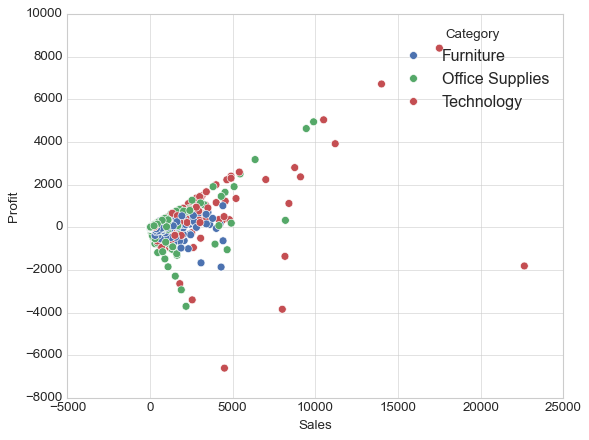

In [43]:
sns.scatterplot(data = df, x = 'Sales', y = 'Profit',hue = 'Category',s = 50)

<Axes: xlabel='Sales', ylabel='Profit'>

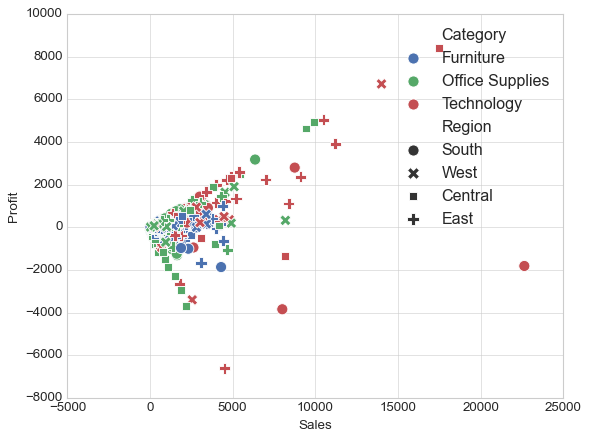

In [46]:
sns.scatterplot(data = df, x = 'Sales', y = 'Profit',hue = 'Category',style = 'Region',s = 100)

### Histograms

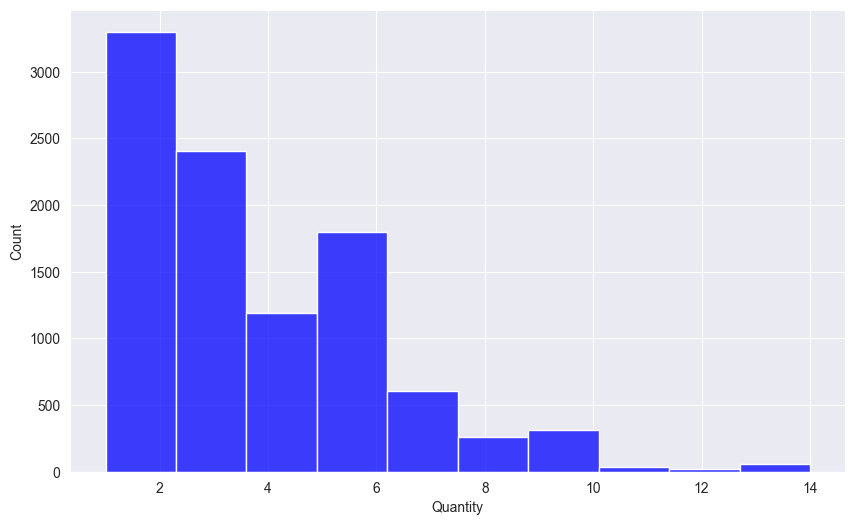

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=10, kde=False, color='blue')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Quantity', ylabel='Density'>

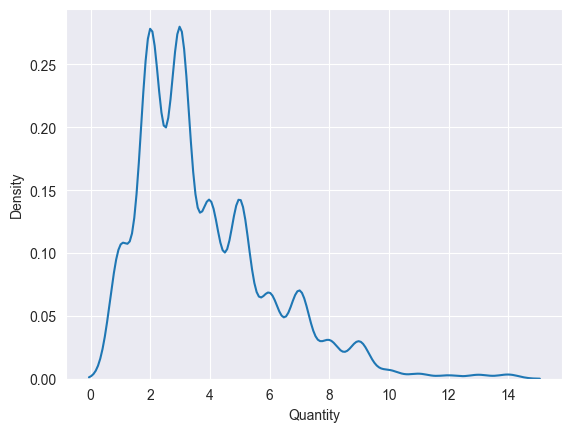

In [11]:
sns.kdeplot(df['Quantity'])

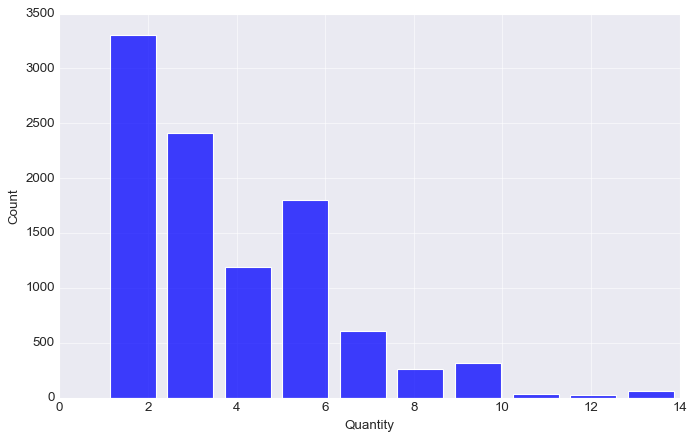

In [48]:
# djust width of bars using shrink

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=10, kde=False, color='blue',shrink=.8)
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

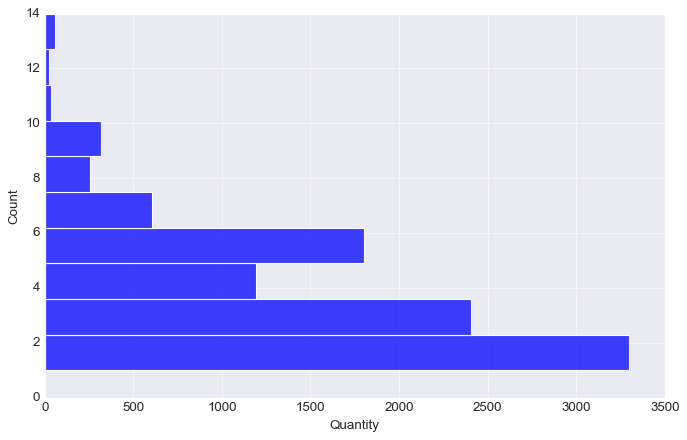

In [49]:
# Horizontal
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.histplot(y = df['Quantity'], bins=10, kde=False, color='blue')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

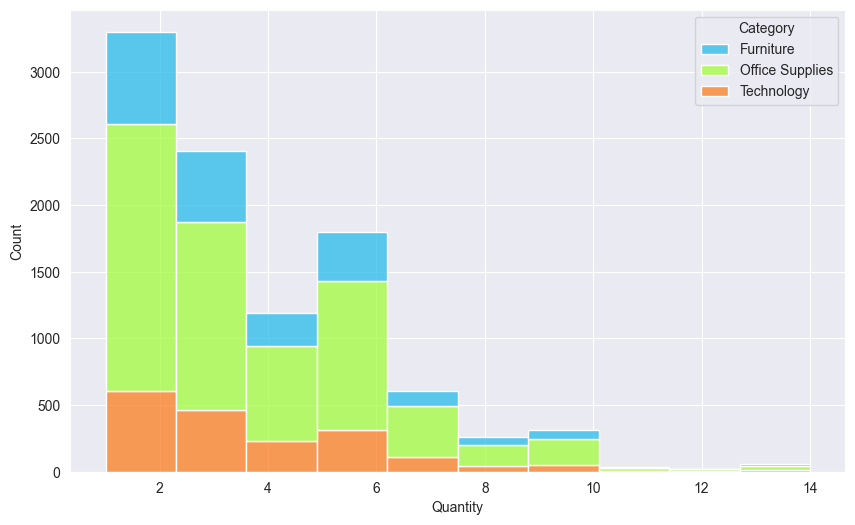

In [15]:
# hue
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.histplot(x = 'Quantity',data = df, bins=10, kde=False, color='blue', hue = 'Category', palette='turbo', multiple = 'stack')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

The default approach to plotting multiple distributions is to “layer” them, but you can also “stack” them:

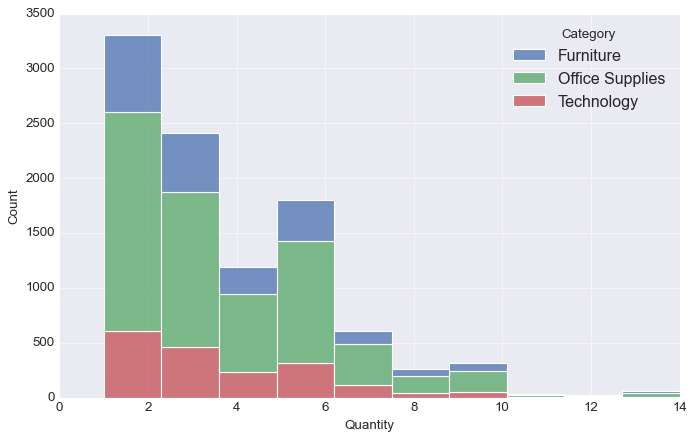

In [31]:
# hue
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.histplot(x = 'Quantity',data = df, bins=10, kde=False, color='blue', hue = 'Category', multiple="stack")
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

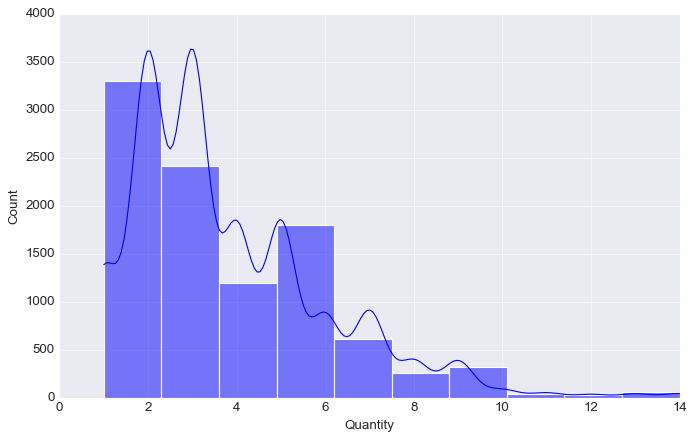

In [32]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=10, kde=True, color='blue',)
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

### kdeplot

<Axes: xlabel='Quantity', ylabel='Density'>

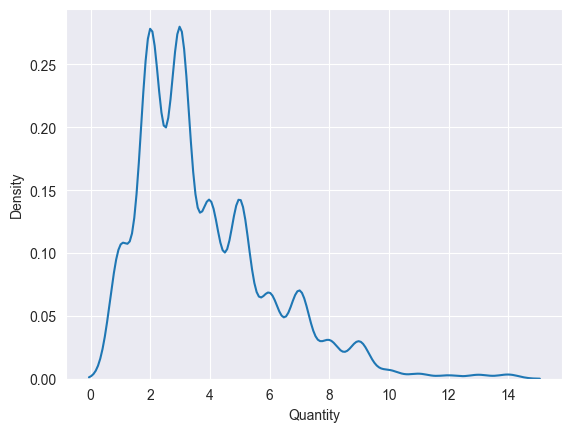

In [17]:

sns.kdeplot(df['Quantity'])

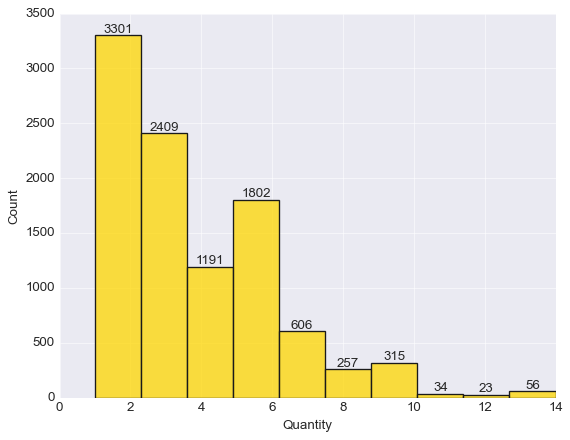

In [34]:
plt.style.use('seaborn-v0_8-darkgrid')
bins = 10
plt.xlabel('Quantity')
plt.ylabel('Count')
hist_plot = sns.histplot(df['Quantity'], bins=10, kde=False, color='gold', edgecolor='k', linewidth=1.2)

# Add text labels on top of each bar
for i in hist_plot.patches:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width() / 2, height + 0.1, int(height), 
             ha='center', va='bottom')

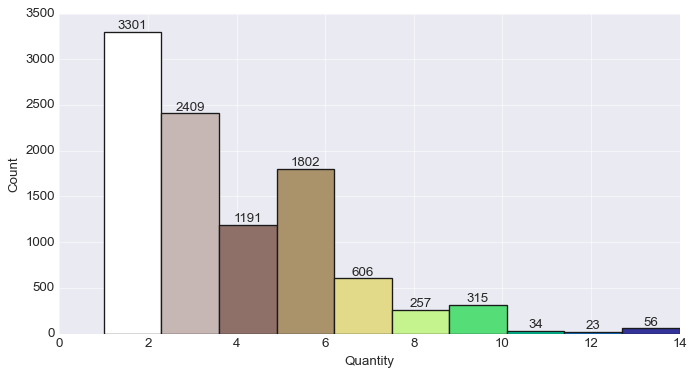

In [35]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize = (10,5))

# Define bins and colormap
bins = 10
cmap = plt.get_cmap('terrain_r')
colors = cmap(np.linspace(0, 1, bins))

# Create a histogram using Seaborn
hist_plot = sns.histplot(df['Quantity'], bins=bins, kde=False, color='gold', edgecolor='k', linewidth=1.2)

# Set colors for each bar
for i, patch in enumerate(hist_plot.patches):
    patch.set_facecolor(colors[i])

# Add text labels on top of each bar
for p in hist_plot.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 0.1, int(height), 
             ha='center', va='bottom')

### Barcharts

In [36]:
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

C:\Users\Naz\AppData\Local\Temp\ipykernel_16804\1626514992.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=categories, y=freq,  palette='viridis')


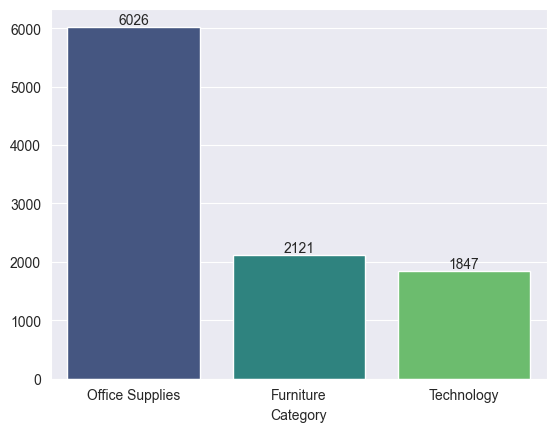

In [20]:
categories = df['Category'].value_counts().index
freq = df['Category'].value_counts().values
bar_plot = sns.barplot(x=categories, y=freq,  palette='viridis')

# Add text labels on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      xytext=(0, 5), 
                      textcoords='offset points')


C:\Users\Naz\AppData\Local\Temp\ipykernel_21464\3662019126.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=counts, y=categories,  palette='viridis')


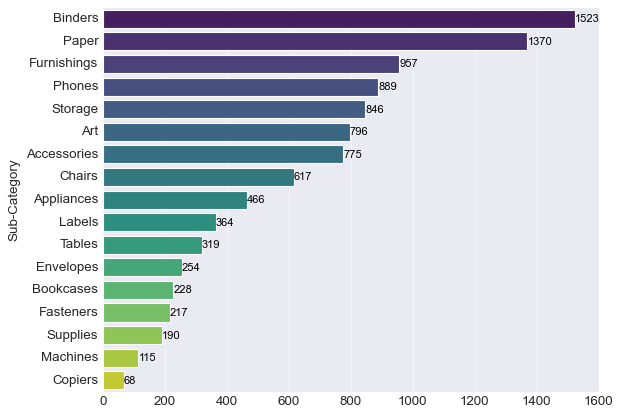

In [38]:
categories = df['Sub-Category'].value_counts().index
counts = df['Sub-Category'].value_counts().values
bar_plot = sns.barplot(x=counts, y=categories,  palette='viridis')
for index, value in enumerate(counts):
    bar_plot.text(value, index, str(value), color='black', ha='left', va='center', fontdict={'fontsize': 10})

plt.show()

In [39]:
sub_df = df.groupby(by = ['Category','Sub-Category'])['Order ID'].count().reset_index()
sub_df

,Category,Sub-Category,Order ID
0,Furniture,Bookcases,228
1,Furniture,Chairs,617
2,Furniture,Furnishings,957
3,Furniture,Tables,319
4,Office Supplies,Appliances,466
5,Office Supplies,Art,796
6,Office Supplies,Binders,1523
7,Office Supplies,Envelopes,254
8,Office Supplies,Fasteners,217
9,Office Supplies,Labels,364


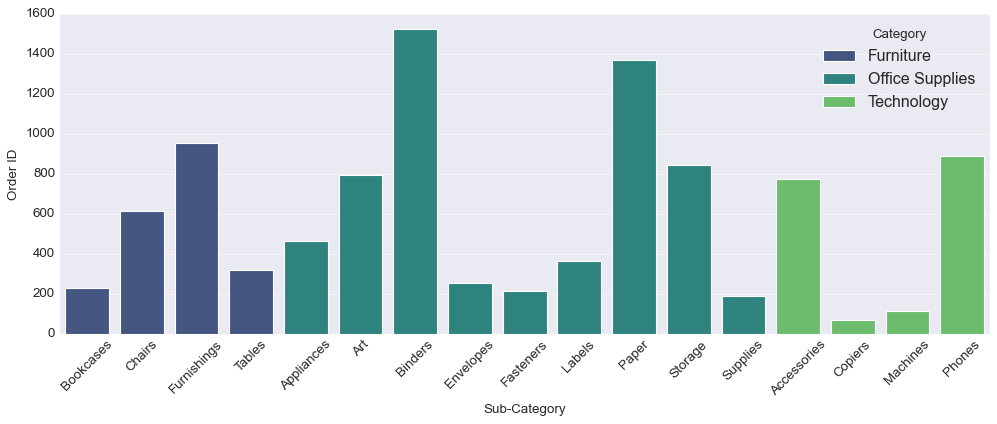

In [40]:
plt.figure(figsize= (15,5))
bar_plot = sns.barplot(y='Order ID', x='Sub-Category', data = sub_df,hue = 'Category', palette='viridis')
plt.xticks(rotation = 45)
plt.show()

In [41]:
sub_df.head()

,Category,Sub-Category,Order ID
0,Furniture,Bookcases,228
1,Furniture,Chairs,617
2,Furniture,Furnishings,957
3,Furniture,Tables,319
4,Office Supplies,Appliances,466


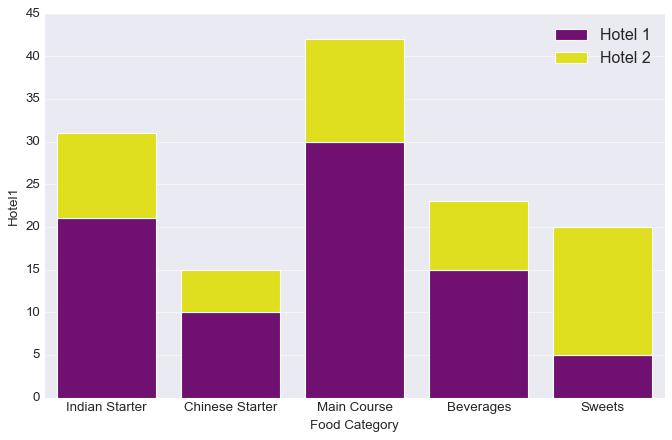

In [43]:
food_categories = ['Indian Starter','Chinese Starter', 'Main Course','Beverages','Sweets']
hotel1_dish_counts = [21, 10, 30, 15, 5]
hotel2_dish_counts = [10, 5, 12, 8, 15]
df_hotel = pd.DataFrame({
    'Food Category': food_categories,
    'Hotel1': hotel1_dish_counts,
    'Hotel2': hotel2_dish_counts
})
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = sns.barplot(x='Food Category', y='Hotel1', data=df_hotel, color='purple', label='Hotel 1', ax=ax)
bar2 = sns.barplot(x='Food Category', y='Hotel2', data=df_hotel, color='yellow', label='Hotel 2', ax=ax, bottom=df_hotel['Hotel1'])


### Piechart

To create a pie chart in Seaborn, you'll need to use Matplotlib because Seaborn does not have built-in support for pie charts. However, you can style the plot using Seaborn's styling options.

### Boxplots

In [21]:
# Lets now use builtin datasets of seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [22]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='age'>

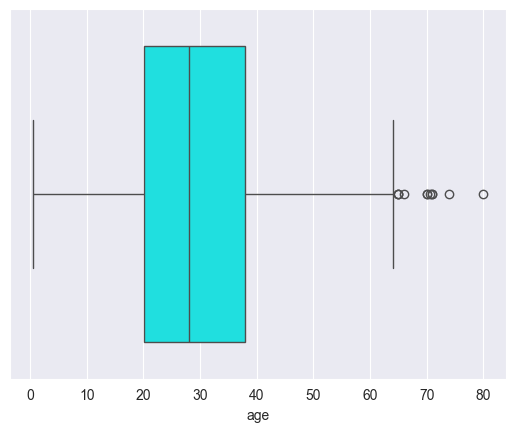

In [24]:
sns.boxplot(data = titanic, x = 'age',color = 'cyan')

<Axes: xlabel='age', ylabel='class'>

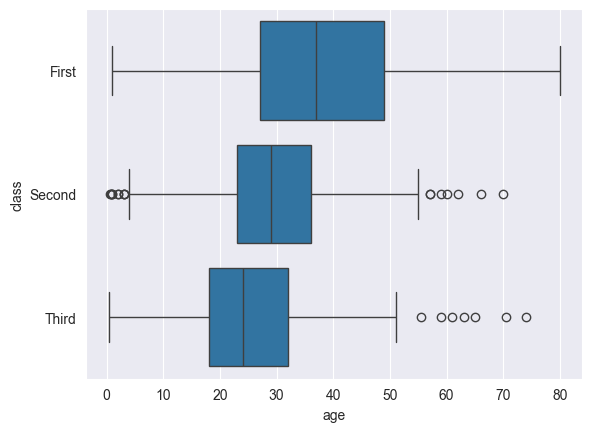

In [28]:
sns.boxplot(data=titanic, x="age", y="class")

<Axes: xlabel='age', ylabel='class'>

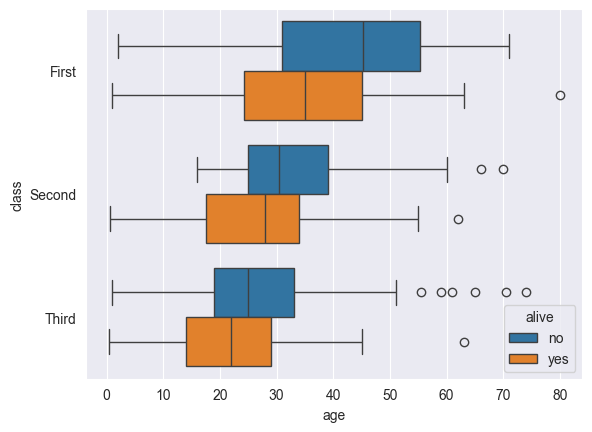

In [29]:
sns.boxplot(data=titanic, x="age", y = 'class', hue="alive")

<Axes: xlabel='age', ylabel='class'>

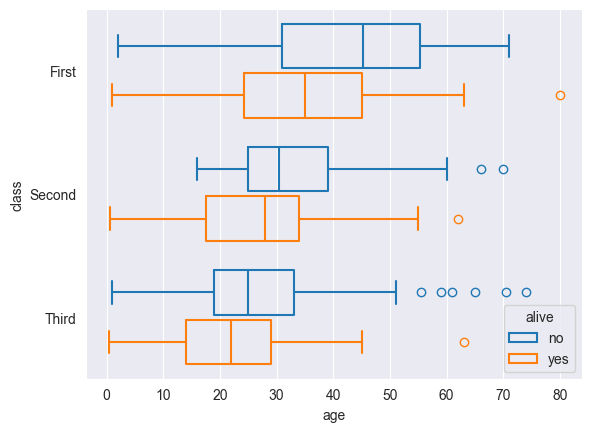

In [31]:
sns.boxplot(data=titanic, y="class", x="age", hue="alive", fill=False, gap=.1)

### Voilinplots

<Axes: xlabel='age'>

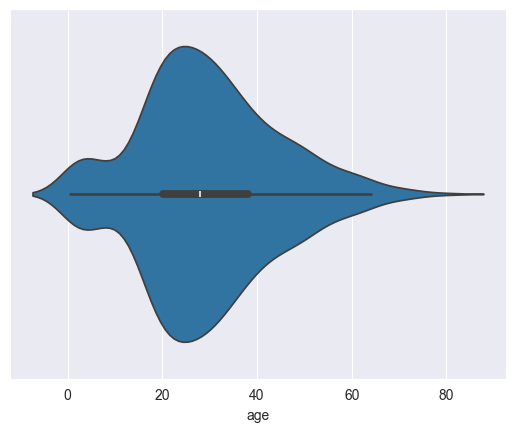

In [33]:
sns.violinplot(data = titanic, x = 'age')

<Axes: xlabel='age', ylabel='sex'>

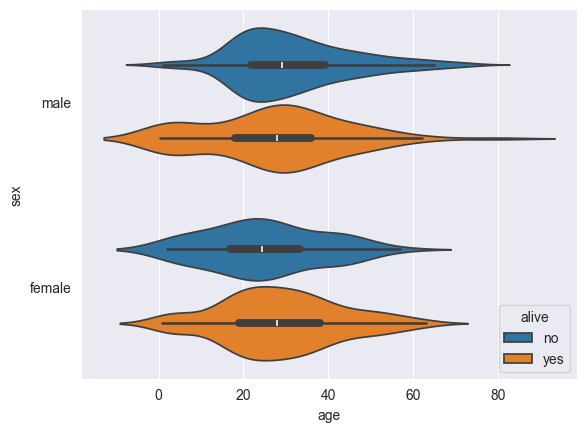

In [36]:
sns.violinplot(data = titanic, x = 'age', y = 'sex', hue = 'alive')

<Axes: xlabel='Quantity', ylabel='Category'>

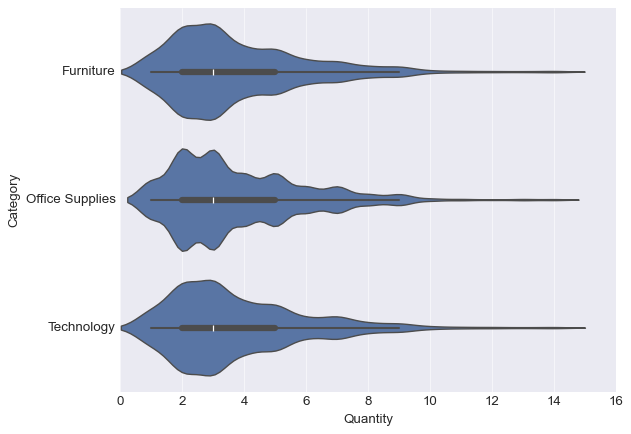

In [51]:
sns.violinplot(data=df, x="Quantity", y="Category")

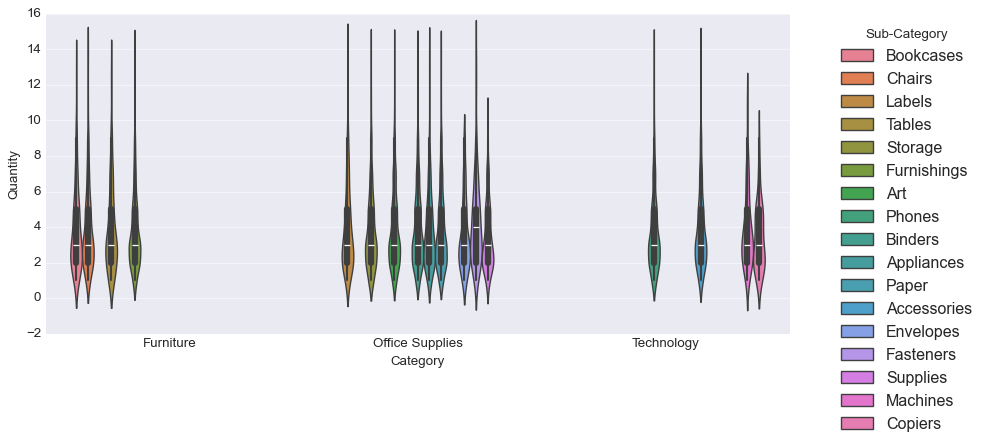

In [52]:
plt.figure(figsize = (12,5))
sns.violinplot(data=df, y="Quantity", x="Category", hue = 'Sub-Category')
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')

### Heatmaps

In [37]:
df = sns.load_dataset("glue")
df

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1
...,...,...,...,...,...
59,BERT,2018,Transformer,RTE,70.1
60,BiLSTM+ELMo,2018,LSTM,RTE,57.4
61,BiLSTM+CoVe,2017,LSTM,RTE,52.7
62,BiLSTM+Attn,2017,LSTM,RTE,58.4


In [38]:
pivot_data = df.pivot_table(index="Model", columns="Task", values="Score")
pivot_data

Task,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
Model,,,,,,,,
BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3
BiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8
BiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4
BiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3
ERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0
RoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2
T5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1


<Axes: xlabel='Task', ylabel='Model'>

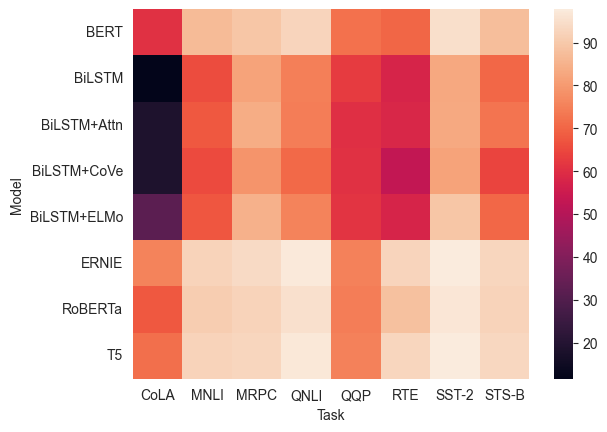

In [39]:
sns.heatmap(pivot_data)

<Axes: xlabel='Task', ylabel='Model'>

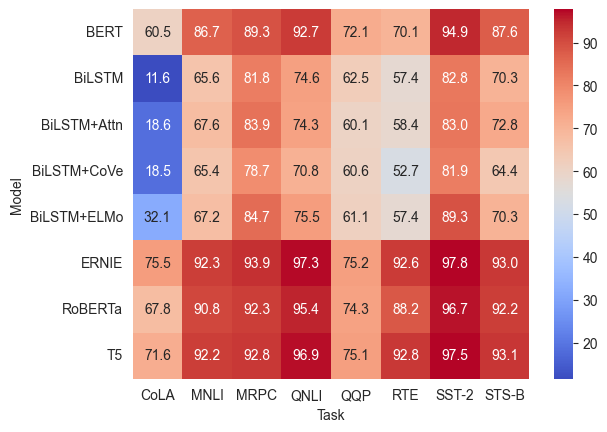

In [42]:
sns.heatmap(pivot_data, annot=True, fmt=".1f", cmap="coolwarm")

In [43]:
data = sns.load_dataset("flights")
data

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [44]:
data = data.pivot_table(index = "month", columns = "year",values = "passengers")
data

C:\Users\Naz\AppData\Local\Temp\ipykernel_16804\2843150583.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  data = data.pivot_table(index = "month", columns = "year",values = "passengers")


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

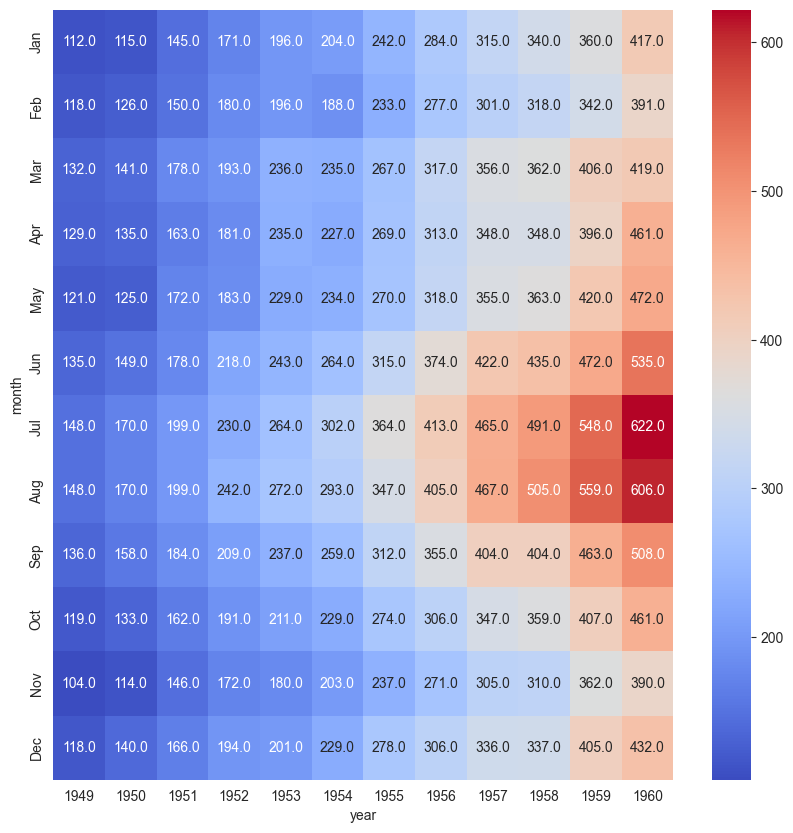

In [47]:
plt.figure(figsize = (10,10))
sns.heatmap(data, annot=True, fmt=".1f", cmap="coolwarm")

In [50]:
df = pd.read_csv('./data/bank-full.csv', sep = ";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [51]:
corr_data = df.select_dtypes(include = ['int64']).corr()
corr_data

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<Axes: >

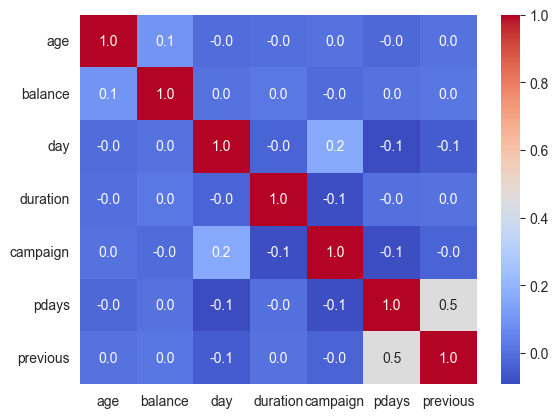

In [54]:
sns.heatmap(corr_data, annot=True, fmt=".1f", cmap="coolwarm")